<center><a target="_blank" href="https://academy.constructor.org/"><img src=https://lh3.googleusercontent.com/d/1EmH3Jks5CpJy0zK3JbkvJZkeqWtVcxhB width="800" style="background:none; border:none; box-shadow:none;" /></a> </center>

_____

# <h1 align="center"> Exercise: Introduction to Visualization, Mapping </h1>
<p style="margin-bottom:1cm;"></p>

_____

<center>Constructor Academy, 2024</center>


# Visualization Day 1

## Table of contents

*  Exercise 1: Line Chart
*  Exercise 2: Bar Chart
*  Exercise 3: Scatterplot
*  Exercise 4: Heatmap
*  Exercise 5: Transforms
*  Exercise 6: Sort

# Preamble
The exercises for Day 1 are to develop familiarity with the APIs and fluency in the basics of plotting.

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# use seaborn style
sns.set()
sns.set_style('darkgrid')

In [ ]:
# matplotlib default settings
plt.rcParamsDefault

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

# Read in data

**SNB Money-market Rate Data**

Data on the money-market rates over various terms, including: overnight (`SARON`), call money rate (`1TGT`), 1, 3, 6, and 12-month CHF-denominated loans (`1M`, `3M0`, `6M`, `12M`, respectively), and USD, JPY, GBP, and EUR-denominated loans (`3M1`, `3M2`, `3M3`, and `3M4`, respectively)

Used in Ex 1 and 2

In [13]:
# orig_url='https://drive.google.com/file/d/1nAW8z4IHxmLFx1GM5w6QBvsYphluWlhz/view?usp=sharing'
# file_id = orig_url.split('/')[-2]
# dwn_url='https://drive.google.com/uc?export=download&id=' + file_id

snb_df = pd.read_csv("../data/snb-data-zimoma-en-all-20200901_1437.csv", sep=";", skiprows=2)
snb_df = snb_df.rename({'D0': 'Instrument'}, axis=1)        # change column name - D0 -> Instrument
snb_df['Date'] = pd.to_datetime(snb_df['Date'])
snb_df

,Date,Instrument,Value
0,1972-01-01,SARON,NaN
1,1972-01-01,1TGT,0.00000
2,1972-01-01,EG3M,NaN
3,1972-01-01,1M,NaN
4,1972-01-01,3M0,NaN
...,...,...,...
6419,2020-08-01,12M,-0.52460
6420,2020-08-01,3M1,0.24088
6421,2020-08-01,3M2,-0.05783
6422,2020-08-01,3M3,0.06400


In [14]:
# re-indexing
snb_df.set_index(['Date', 'Instrument'])

Value
Date       Instrument         
1972-01-01 SARON           NaN
           1TGT        0.00000
           EG3M            NaN
           1M              NaN
           3M0             NaN
...                        ...
2020-08-01 12M        -0.52460
           3M1         0.24088
           3M2        -0.05783
           3M3         0.06400
           3M4        -0.50871

[6424 rows x 1 columns]

**Below are two ways to pivot a table** - transform into a wide-form table
<br> let's see which one is more efficient

In [21]:
import time

In [29]:
s = time.process_time() # start

pt1 = snb_df.set_index(['Date', 'Instrument']).unstack()['Value']

e = time.process_time() # end

print(f"process time = {np.round(e-s, 3)} sec")
pt1


process time = 0.012 sec


Instrument,12M,1M,1TGT,3M0,3M1,3M2,3M3,3M4,6M,EG3M,SARON
Date,,,,,,,,,,,
1972-01-01,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-02-01,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-03-01,NaN,NaN,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-04-01,NaN,NaN,0.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-05-01,NaN,NaN,1.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01,-0.4410,-0.7218,-0.850,-0.5832,0.55613,-0.00300,0.59425,-0.18500,-0.5600,-0.719,-0.65946
2020-05-01,-0.4776,-0.7610,-0.850,-0.6510,0.34400,-0.04083,0.22775,-0.34657,-0.5972,-0.734,-0.65962
2020-06-01,-0.4724,-0.7674,-0.900,-0.6760,0.30200,-0.04717,0.14088,-0.42200,-0.6264,-0.734,-0.66239


In [30]:
s = time.process_time() # start
pt2 = snb_df.pivot(index='Date', columns='Instrument', values='Value')
e = time.process_time() # end

print(f"process time = {np.round(e-s, 3)} sec")
pt2

process time = 0.007 sec


Instrument,12M,1M,1TGT,3M0,3M1,3M2,3M3,3M4,6M,EG3M,SARON
Date,,,,,,,,,,,
1972-01-01,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-02-01,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-03-01,NaN,NaN,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-04-01,NaN,NaN,0.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-05-01,NaN,NaN,1.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01,-0.4410,-0.7218,-0.850,-0.5832,0.55613,-0.00300,0.59425,-0.18500,-0.5600,-0.719,-0.65946
2020-05-01,-0.4776,-0.7610,-0.850,-0.6510,0.34400,-0.04083,0.22775,-0.34657,-0.5972,-0.734,-0.65962
2020-06-01,-0.4724,-0.7674,-0.900,-0.6760,0.30200,-0.04717,0.14088,-0.42200,-0.6264,-0.734,-0.66239


In [31]:
snb_df = pt2

In [32]:
term_order = ['SARON', '1TGT', '1M', 'EG3M', '3M0', '3M1', '3M2', '3M3', '3M4', '6M', '12M']
snb_df = snb_df[term_order]
snb_df.head()

Instrument,SARON,1TGT,1M,EG3M,3M0,3M1,3M2,3M3,3M4,6M,12M
Date,,,,,,,,,,,
1972-01-01,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-02-01,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-03-01,NaN,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-04-01,NaN,0.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-05-01,NaN,1.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**MPG Data**

Data about a selection of automobiles in two years: 1999 and 2008. Includes information about the manufacturer and model of each car, as well as data on the type of car (`class`), the size of the engine (`displ`, `cyl`), the type of transmission (`trans`), and city and highway fuel efficiency (`cty`, `hwy`) in miles/gallon of fuel units.

Used in Ex 3, 4, 5

In [33]:
# orig_url='https://drive.google.com/file/d/1NYe6jyM1g8PpER3TffWjynBpuAWK14Jx/view?usp=sharing'
# file_id = orig_url.split('/')[-2]
# dwn_url='https://drive.google.com/uc?export=download&id=' + file_id

mpg_df = pd.read_csv("../data/mpg.csv")
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


**Antibiotics Data**

Data on the dosage of `antibiotic` (`mic` or _minimum inhibitory concentration_ in $\mu$g/ml) necessary to kill various `bacteria`, and the `gram`-type of each bacterium.

Used in Ex 4, 5, 6

In [52]:
# orig_url='https://drive.google.com/file/d/1if_OcwnWo9INlTlKAEUJkeuJXDWpHPVB/view?usp=sharing'
# file_id = orig_url.split('/')[-2]
# dwn_url='https://drive.google.com/uc?export=download&id=' + file_id

antibiotics_df = pd.read_json("../data/burtin.json", orient='records')
antibiotics_df.head(10)

,bacteria,penicillin,streptomycin,neomycin,gram
0,Mycobacterium tuberculosis,800.000,5.00,2.000,negative
1,Salmonella schottmuelleri,10.000,0.80,0.090,negative
2,Proteus vulgaris,3.000,0.10,0.100,negative
3,Klebsiella pneumoniae,850.000,1.20,1.000,negative
4,Brucella abortus,1.000,2.00,0.020,negative
5,Pseudomonas aeruginosa,850.000,2.00,0.400,negative
6,Escherichia coli,100.000,0.40,0.100,negative
7,Salmonella (Eberthella) typhosa,1.000,0.40,0.008,negative
8,Aerobacter aerogenes,870.000,1.00,1.600,negative
9,Brucella antracis,0.001,0.01,0.007,positive


In [53]:
antibiotics_df = antibiotics_df.set_index(['bacteria', 'gram'])
antibiotics_df.head(10)

,,penicillin,streptomycin,neomycin
bacteria,gram,,,
Mycobacterium tuberculosis,negative,800.000,5.00,2.000
Salmonella schottmuelleri,negative,10.000,0.80,0.090
Proteus vulgaris,negative,3.000,0.10,0.100
Klebsiella pneumoniae,negative,850.000,1.20,1.000
Brucella abortus,negative,1.000,2.00,0.020
Pseudomonas aeruginosa,negative,850.000,2.00,0.400
Escherichia coli,negative,100.000,0.40,0.100
Salmonella (Eberthella) typhosa,negative,1.000,0.40,0.008
Aerobacter aerogenes,negative,870.000,1.00,1.600


In [54]:
antibiotics_df = antibiotics_df.stack().reset_index()
antibiotics_df.columns = ['bacteria', 'gram', 'antibiotic', 'mic']  # mic = minimum inhibitory concentration

antibiotics_df.head(10)

,bacteria,gram,antibiotic,mic
0,Mycobacterium tuberculosis,negative,penicillin,800.00
1,Mycobacterium tuberculosis,negative,streptomycin,5.00
2,Mycobacterium tuberculosis,negative,neomycin,2.00
3,Salmonella schottmuelleri,negative,penicillin,10.00
4,Salmonella schottmuelleri,negative,streptomycin,0.80
5,Salmonella schottmuelleri,negative,neomycin,0.09
6,Proteus vulgaris,negative,penicillin,3.00
7,Proteus vulgaris,negative,streptomycin,0.10
8,Proteus vulgaris,negative,neomycin,0.10
9,Klebsiella pneumoniae,negative,penicillin,850.00


In [ ]:
# assign an id to each bacterium
bid_dict = {b:i for i, b in enumerate(sorted(pd.unique(antibiotics_df['bacteria'])))}
antibiotics_df['bid'] = antibiotics_df.apply(lambda x: bid_dict[x['bacteria']], 1)
antibiotics_df

In [57]:
# extract the genus of each bacterium
antibiotics_df['genus'] = antibiotics_df['bacteria'].apply(lambda x: x.split(" ")[0])
antibiotics_df

,bacteria,gram,antibiotic,mic,bid,genus
0,Mycobacterium tuberculosis,negative,penicillin,800.000,6,Mycobacterium
1,Mycobacterium tuberculosis,negative,streptomycin,5.000,6,Mycobacterium
2,Mycobacterium tuberculosis,negative,neomycin,2.000,6,Mycobacterium
3,Salmonella schottmuelleri,negative,penicillin,10.000,10,Salmonella
4,Salmonella schottmuelleri,negative,streptomycin,0.800,10,Salmonella
5,Salmonella schottmuelleri,negative,neomycin,0.090,10,Salmonella
6,Proteus vulgaris,negative,penicillin,3.000,7,Proteus
7,Proteus vulgaris,negative,streptomycin,0.100,7,Proteus
8,Proteus vulgaris,negative,neomycin,0.100,7,Proteus
9,Klebsiella pneumoniae,negative,penicillin,850.000,5,Klebsiella


# Basic Plotting

## Ex. 1: Line Chart

A line chart is a standard way of showing the evolution of a variable over time. A line chart can be realized using the `plot` function in pandas or the `plot` function of a matplotlib `ax` or `pyplot` object.

### Ex. 1.1

The snb_df includes a `1TGT` column for of rates for tomorrow-next loans. Plot a line chart of this column.

### Ex 1.2

Add a title and y-axis label to the plot from Ex 1.1. The title should be `Swiss Call Money Rate`. The y-axis label should be "Yield (%)".

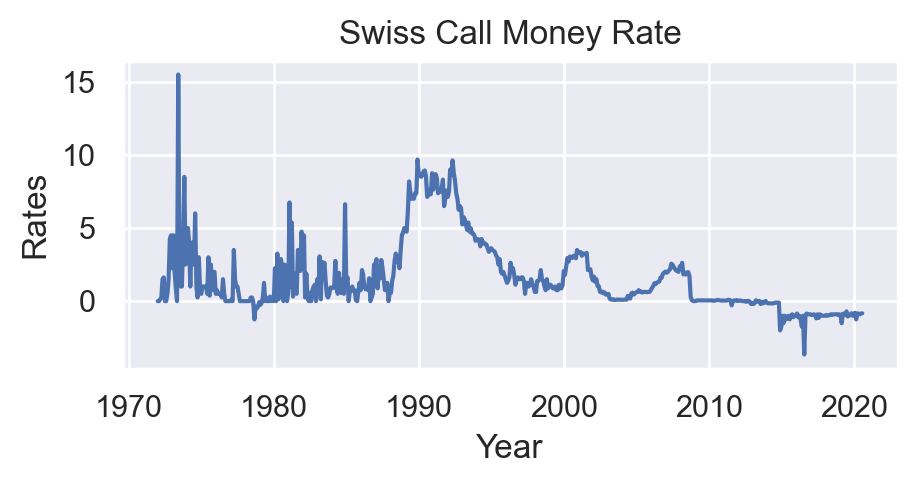

In [93]:
# code your solution here
plt.plot(snb_df['1TGT'])
plt.ylabel('Rates')
plt.xlabel('Year')
plt.title('Swiss Call Money Rate')
plt.rcParams["figure.figsize"] = (5, 2)


## Ex. 2: Bar Chart

A bar chart can also show the evolution of a variable over time. This can be a good option if the data are discrete rather than continous.

A bar plot can be created using the pandas `plot.bar` function or the `bar` function on a matplotlib `ax` or `pyplot` object.

### Ex 2.1

Using the same data is an Ex.1, plot a bar chart of the *average 1TGT rate per year*. Make the figure 10x6 inches.

Step 1, group the data by year and compute the mean.

In [ ]:
snb_df.reset_index()['']

Instrument,Date,SARON,1TGT,1M,EG3M,3M0,3M1,3M2,3M3,3M4,6M,12M
0,1972-01-01,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1972-02-01,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1972-03-01,NaN,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1972-04-01,NaN,0.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1972-05-01,NaN,1.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
579,2020-04-01,-0.65946,-0.850,-0.7218,-0.719,-0.5832,0.55613,-0.00300,0.59425,-0.18500,-0.5600,-0.4410
580,2020-05-01,-0.65962,-0.850,-0.7610,-0.734,-0.6510,0.34400,-0.04083,0.22775,-0.34657,-0.5972,-0.4776
581,2020-06-01,-0.66239,-0.900,-0.7674,-0.734,-0.6760,0.30200,-0.04717,0.14088,-0.42200,-0.6264,-0.4724
582,2020-07-01,-0.70370,-0.850,-0.7878,-0.738,-0.7048,0.24875,-0.05517,0.08438,-0.44471,-0.6562,-0.5280


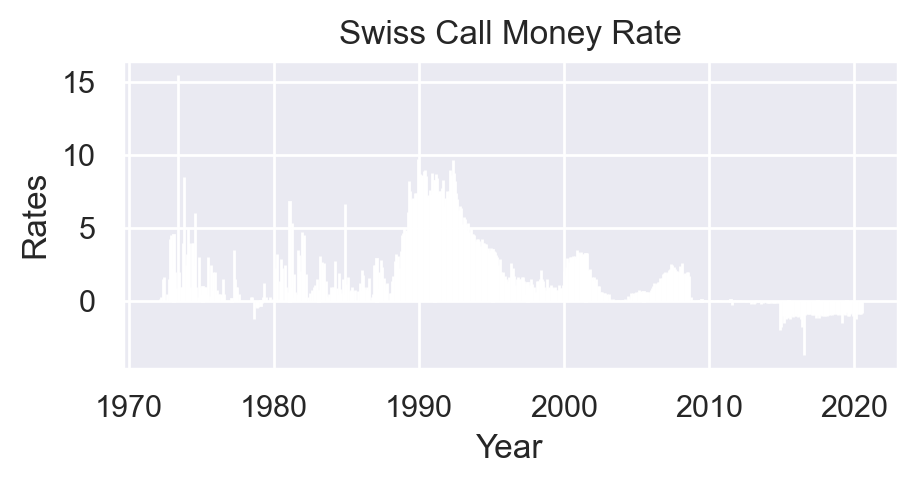

In [ ]:
# code your solution here
plt.bar(snb_df.reset_index()['Date'], snb_df.reset_index()['1TGT'])
plt.ylabel('Rates')
plt.xlabel('Year')
plt.title('Swiss Call Money Rate');

Step 2, plot the mean `1TGT` series.

In [97]:
# code your solution here
snb_df = snb_df.reset_index()

In [ ]:
snb_df['Year'] = snb_df['Date'].dt.strftime('%Y')
snb_df.head(10)

Instrument,Date,SARON,1TGT,1M,EG3M,3M0,3M1,3M2,3M3,3M4,6M,12M,Year
0,1972-01-01,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972
1,1972-02-01,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972
2,1972-03-01,NaN,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972
3,1972-04-01,NaN,0.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972
4,1972-05-01,NaN,1.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972
...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,2020-04-01,-0.65946,-0.850,-0.7218,-0.719,-0.5832,0.55613,-0.00300,0.59425,-0.18500,-0.5600,-0.4410,2020
580,2020-05-01,-0.65962,-0.850,-0.7610,-0.734,-0.6510,0.34400,-0.04083,0.22775,-0.34657,-0.5972,-0.4776,2020
581,2020-06-01,-0.66239,-0.900,-0.7674,-0.734,-0.6760,0.30200,-0.04717,0.14088,-0.42200,-0.6264,-0.4724,2020
582,2020-07-01,-0.70370,-0.850,-0.7878,-0.738,-0.7048,0.24875,-0.05517,0.08438,-0.44471,-0.6562,-0.5280,2020


## Ex 2.2

Take the plot from Ex 2.1 and make the following changes:
- Add a title: `Average Swiss Call Money Rate by Year`
- Set the y-axis label to `Yield (%)`.
- Only label every 5th year between 1975 to 2020 (e.g., 1975, 1980, 1985, etc.) on the x-axis. The other years should have no label.

In [ ]:
# code your solution here

## Ex 3: Scatterplot

A scatterplot can be used to show any relationship between two variables.

### Ex 3.1

Using the `mpg_df` dataframe, make a scatterplot with `hwy` on the x-axis and `cty` on the y-axis. Give the plot the title `Highway vs. City Fuel Mileage`, and label the x-axis `Highway` and the y-axis `City`.

In [ ]:
# code your solution here

### Ex 3.2

As in 3.1 use the `mpg_df` dataframe to make a scatterplot with `hwy` on the x-axis and `cty` on the y-axis.
This time, use different mark shapes for cars from the year 1999 and 2008. For example, draw cars from 1999 as +'s, those from 2008 as x's.

In [ ]:
# code your solution here

### Ex 3.3

As in 3.1 use the `mpg_df` dataframe to make a scatterplot with `hwy` on the x-axis and `cty` on the y-axis, using the default mark shapes (dots).
This time, color all marks representing data from the year 1999 in a different color than those from 2008. Set the `alpha` of the marks to 0.5. Why are some dots neither of the two colors you explicitly selected?

In [ ]:
# code your solution here

### Ex 3.4

As in 3.3 use the `mpg_df` dataframe to make a scatterplot with `hwy` on the x-axis and `cty` on the y-axis. Again, color all marks representing data from the year 1999 in a different color than those from 2008, this time using two colors from the ColorBrewer `Dark2` palette.

In [ ]:
# code your solution here

### Ex 3.5
Again, use the `mpg_df` dataframe to make a scatterplot with `hwy` on the x-axis and `cty` on the y-axis.
This time, map the `class` column of the dataframe to color. You will need a palette with seven (7) colors. All `subcompact` cars should be one color, all `compact` cars another color, etc.

In [ ]:
# code your solution here

### Ex 3.6
Make the same plot as in 3.5, but use different mark shapes for cars from the year 1999 vs. 2008. For example, draw cars from 1999 as +'s, those from 2008 as x's.

In [ ]:
# code your solution here

## Ex 4: Heatmap

A heatmap can be used to display three variables of data, two mapped to x and y position of a mark, the third mapped to color. The seaborn `heatmap` function provides an easy to way make heatmaps.

### Ex 4.1

Using the `antibiotics_df` dataframe, make a heatmap with `antibiotic` on the x-axis and `bacteria` on the y-axis, and the `mic` column represented using color. Label the x-axis `Bacterium`, the y-axis `Antibiotic`, and give the entire plot the title `MIC of Antibiotics`.

In [ ]:
# code your solution here

### Ex 4.2

As in Ex 4.1, use the `antibiotics_df` dataframe to make a heatmap with `antibiotic` on the x-axis and `bacteria` on the y-axis, and the `mic` column represented using color. This time, use a log scale for the `mic` column / color mapping.

In [ ]:
# code your solution here

## Ex 5: Transforms

Data transformations can make a chart easier to understand and are necessary to even be able to present the data in some cases.

### Ex 5.1

Using the `antibiotics_df` dataframe, plot the `mic` column for `penicillin` as a bar chart. Sort the values in descending order to make visualization easier to interpret.

In [ ]:
# code your solution here

### Ex 5.2

Make the same visualization as in 5.1, but use a log scale for the y-axis.

In [ ]:
# code your solution here

### Ex 5.3

Make the same visualization as in 5.2, but invert the y-axis so it goes from 1000 to 0.001, where the shortest bars represent a dosage of 1000 $\mu$g/ml. What is an appropriate label for the y-axis?

In [ ]:
# code your solution here

### Ex 5.4

Take the solution from 5.3, but additionally color the gram positive bacteria differently from the gram negative bacteria.

Step 1, create a data frame that contains the MIC of penicillin and the gram of each bacterium

In [ ]:
# try to solve this yourself. If you are stuck, uncomment the next line and execute this cell
# %load fragment-5.4.1.py

Step 2, plot

In [ ]:
# code your solution here

## Ex 6: Sort

### Ex 6.1

Redo the heatmap from 4.2, this time sort the rows by dosage of `neomycin` in ascending order. This will structure and make it easier to interpret the plot.

In [ ]:
# code your solution here